In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

In [3]:
players = pd.read_csv("/Users/atharvatijare/Desktop/Atharva/College/Charlotte/Intro to Machine Learning/Final Project/1991-2021 NBA Players Dataset/1991-2021 NBA Players Dataset/players.csv", encoding="latin-1", delimiter=";")
mvps = pd.read_csv("/Users/atharvatijare/Desktop/Atharva/College/Charlotte/Intro to Machine Learning/Final Project/1991-2021 NBA Players Dataset/1991-2021 NBA Players Dataset/mvps.csv", encoding="latin-1", delimiter=";")
teams = pd.read_csv("/Users/atharvatijare/Desktop/Atharva/College/Charlotte/Intro to Machine Learning/Final Project/1991-2021 NBA Players Dataset/1991-2021 NBA Players Dataset/teams.csv", encoding="latin-1", delimiter=";")
nicknames = pd.read_csv("/Users/atharvatijare/Desktop/Atharva/College/Charlotte/Intro to Machine Learning/Final Project/1991-2021 NBA Players Dataset/1991-2021 NBA Players Dataset/nicknames.csv", encoding="latin-1", delimiter=";")

In [4]:
players

Rk              Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0        1      Alaa Abdelnaby  PF  22  POR  43   0   6.7  1.3   2.7  ...   
1        2  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  22.5  6.2  15.1  ...   
2        3          Mark Acres   C  28  ORL  68   0  19.3  1.6   3.1  ...   
3        4       Michael Adams  PG  28  DEN  66  66  35.5  8.5  21.5  ...   
4        5        Mark Aguirre  SF  31  DET  78  13  25.7  5.4  11.7  ...   
...    ...                 ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
18039  536        Delon Wright  PG  28  SAC  27   8  25.8  3.9   8.3  ...   
18040  537      Thaddeus Young  PF  32  CHI  68  23  24.3  5.4   9.7  ...   
18041  538          Trae Young  PG  22  ATL  63  63  33.7  7.7  17.7  ...   
18042  539         Cody Zeller   C  28  CHO  48  21  20.9  3.8   6.8  ...   
18043  540         Ivica Zubac   C  23  LAC  72  33  22.3  3.6   5.5  ...   

       ORB  DRB  TRB   AST  STL  BLK  TOV   PF   PTS  Year  
0      0.6  1.4  2.1   0.3  0.1  0.3  0.5  0.9   3.1  1991  
1      0.5  1.3  1.8   3.1  0.8  0.1  1.6  2.2  14.1  1991  
2      2.1  3.2  5.3   0.4  0.4  0.4  0.6  3.2   4.2  1991  
3      0.9    3  3.9  10.5  2.2  0.1  3.6  2.5  26.5  1991  
4      1.7  3.1  4.8   1.8  0.6  0.3  1.6  2.7  14.2  1991  
...    ...  ...  ...   ...  ...  ...  ...  ...   ...   ...  
18039    1  2.9  3.9   3.6  1.6  0.4  1.3  1.1    10  2021  
18040  2.5  3.8  6.2   4.3  1.1  0.6    2  2.2  12.1  2021  
18041  0.6  3.3  3.9   9.4  0.8  0.2  4.1  1.8  25.3  2021  
18042  2.5  4.4  6.8   1.8  0.6  0.4  1.1  2.5   9.4  2021  
18043  2.6  4.6  7.2   1.3  0.3  0.9  1.1  2.6     9  2021  

[18044 rows x 31 columns]

In [5]:
mvps

Rank             Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
0      1     Michael Jordan   27  CHI     77      891      960  0.928  82   
1      2      Magic Johnson   31  LAL     10      497      960  0.518  79   
2      3     David Robinson   25  SAS      6      476      960  0.496  82   
3      4    Charles Barkley   27  PHI      2      222      960  0.231  67   
4      5        Karl Malone   27  UTA      0      142      960  0.148  82   
..   ...                ...  ...  ...    ...      ...      ...    ...  ..   
469   11  Russell Westbrook   32  WAS      0        5     1010  0.005  65   
470   12        Ben Simmons   24  PHI      0        3     1010  0.003  58   
471  13T       James Harden   31  TOT      0        1     1010  0.001  44   
472  13T       LeBron James   36  LAL      0        1     1010  0.001  45   
473  13T      Kawhi Leonard   29  LAC      0        1     1010  0.001  52   

       MP  ...   TRB   AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  Year  
0    37.0  ...   6.0   5.5  2.7  1.0  0.539  0.312  0.851  20.3  0.321  1991  
1    37.1  ...   7.0  12.5  1.3  0.2  0.477  0.320  0.906  15.4  0.251  1991  
2    37.7  ...  13.0   2.5  1.5  3.9  0.552  0.143  0.762  17.0  0.264  1991  
3    37.3  ...  10.1   4.2  1.6  0.5  0.570  0.284  0.722  13.4  0.258  1991  
4    40.3  ...  11.8   3.3  1.1  1.0  0.527  0.286  0.770  15.5  0.225  1991  
..    ...  ...   ...   ...  ...  ...    ...    ...    ...   ...    ...   ...  
469  36.4  ...  11.5  11.7  1.4  0.4  0.439  0.315  0.656   3.7  0.075  2021  
470  32.4  ...   7.2   6.9  1.6  0.6  0.557  0.300  0.613   6.0  0.153  2021  
471  36.6  ...   7.9  10.8  1.2  0.8  0.466  0.362  0.861   7.0  0.208  2021  
472  33.4  ...   7.7   7.8  1.1  0.6  0.513  0.365  0.698   5.6  0.179  2021  
473  34.1  ...   6.5   5.2  1.6  0.4  0.512  0.398  0.885   8.8  0.238  2021  

[474 rows x 21 columns]

In [6]:
teams.head(20)

W                 L              W/L%                GB  \
0                 56                26             0.683                    
1                 44                38             0.537                12   
2                 39                43             0.476                17   
3                 30                52             0.366                26   
4                 26                56             0.317                30   
5                 24                58             0.293                32   
6   Central Division  Central Division  Central Division  Central Division   
7                 61                21             0.744                    
8                 50                32              0.61                11   
9                 48                34             0.585                13   
10                43                39             0.524                18   
11                41                41               0.5                20   
12                33                49             0.402                28   
13                26                56             0.317                35   
14  Midwest Division  Midwest Division  Midwest Division  Midwest Division   
15                55                27             0.671                    
16                54                28             0.659                 1   
17                52                30             0.634                 3   
18                31                51             0.378                24   
19                29                53             0.354                26   

                PS/G              PA/G               SRS  Year  \
0              111.5             105.7              5.22  1991   
1              105.4             105.6             -0.39  1991   
2              103.1             103.3             -0.43  1991   
3              101.4             106.4             -4.84  1991   
4              102.9             107.5             -4.53  1991   
5              101.8             107.8             -5.91  1991   
6   Central Division  Central Division  Central Division  1991   
7                110               101              8.57  1991   
8              100.1              96.8              3.08  1991   
9              106.4               104              2.33  1991   
10             109.8               109              0.72  1991   
11             111.7             112.1             -0.37  1991   
12             101.7             104.2             -2.33  1991   
13             102.8               108             -4.95  1991   
14  Midwest Division  Midwest Division  Midwest Division  1991   
15             107.1             102.6               4.3  1991   
16               104             100.7              3.18  1991   
17             106.7             103.2              3.27  1991   
18             105.9             109.9             -3.79  1991   
19              99.6             103.5             -3.75  1991   

                      Team  
0          Boston Celtics*  
1      Philadelphia 76ers*  
2         New York Knicks*  
3       Washington Bullets  
4          New Jersey Nets  
5               Miami Heat  
6         Central Division  
7           Chicago Bulls*  
8         Detroit Pistons*  
9         Milwaukee Bucks*  
10          Atlanta Hawks*  
11         Indiana Pacers*  
12     Cleveland Cavaliers  
13       Charlotte Hornets  
14        Midwest Division  
15      San Antonio Spurs*  
16              Utah Jazz*  
17        Houston Rockets*  
18           Orlando Magic  
19  Minnesota Timberwolves

In [7]:
players[players["Player"] == "Delon Wright"]

Rk        Player    Pos Age   Tm   G  GS    MP   FG   FGA  ...  ORB  \
14590  469  Delon Wright     PG  23  TOR  27   1   8.5  1.3     3  ...  0.3   
15205  477  Delon Wright     PG  24  TOR  27   0  16.5  1.8   4.3  ...  0.6   
15892  530  Delon Wright     PG  25  TOR  69   4  20.8  2.9   6.3  ...  0.7   
16623  522  Delon Wright     PG  26  TOT  75  13  22.7  3.2   7.4  ...  0.9   
16624  522  Delon Wright     PG  26  TOR  49   2  18.3  2.6     6  ...  0.8   
16625  522  Delon Wright     PG  26  MEM  26  11  30.8  4.4  10.2  ...  1.1   
17306  522  Delon Wright     PG  27  DAL  73   5  21.5  2.6   5.6  ...    1   
18037  536  Delon Wright  SG-PG  28  TOT  63  39  27.7  3.8   8.2  ...    1   
18038  536  Delon Wright     SG  28  DET  36  31  29.2  3.8   8.1  ...    1   
18039  536  Delon Wright     PG  28  SAC  27   8  25.8  3.9   8.3  ...    1   

       DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Year  
14590  1.1  1.4  1.1  0.3  0.1  0.6  0.3   3.8  2016  
15205  1.2  1.8  2.1    1  0.4  0.9  1.1   5.6  2017  
15892  2.2  2.9  2.9    1  0.5  1.1  1.2     8  2018  
16623  2.6  3.5  3.3  1.2  0.4    1  1.4   8.7  2019  
16624  1.8  2.6  2.2  0.9  0.3  0.8  1.1   6.9  2019  
16625  4.3  5.4  5.3  1.6  0.6  1.5  1.9  12.2  2019  
17306  2.9  3.8  3.3  1.2  0.3    1  1.3   6.9  2020  
18037  3.2  4.3  4.4  1.6  0.5  1.3  1.2  10.2  2021  
18038  3.5  4.6    5  1.6  0.5  1.3  1.3  10.4  2021  
18039  2.9  3.9  3.6  1.6  0.4  1.3  1.1    10  2021  

[10 rows x 31 columns]

## Cleaning MVPS Dataset

In [9]:
## Portions of the Cleaning MVPS Dataset were developed with assistance from Kaggle's NBA Stats: Data Cleaning section to help ##
## interpret instructions, clarify implementation steps, and structure code. Final code was reviewed and edited by me. ##

In [10]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvps.head()

Player  Year  Pts Won  Pts Max  Share
0   Michael Jordan  1991      891      960  0.928
1    Magic Johnson  1991      497      960  0.518
2   David Robinson  1991      476      960  0.496
3  Charles Barkley  1991      222      960  0.231
4      Karl Malone  1991      142      960  0.148

In [11]:
mvp_winners = mvps.sort_values("Share", ascending=False).drop_duplicates("Year")
mvp_winners = mvp_winners[["Player", "Year"]]
mvp_winners["MVP"] = 1

## Cleaning Players Dataset

In [13]:
## Portions of the Cleaning Players Dataset were developed with assistance from Kaggle's NBA Stats: Data Cleaning section to help ##
## interpret instructions, clarify implementation steps, and structure code. Final code was reviewed and edited by me. ##

In [14]:
# Remove unnecessary columns
del players["Rk"]

## Remove asterisks from player names. 
players["Player"] = players["Player"].str.replace("*","", regex=False)

## Merge players' names to create one row for each year
def single_team(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

players = players.groupby(["Player", "Year"]).apply(single_team)

## Remove added index columns
players.index = players.index.droplevel()
players.index = players.index.droplevel()

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_56464/2555558481.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players = players.groupby(["Player", "Year"]).apply(single_team)


In [15]:
## Testing code changes
players[players["Player"] == "Delon Wright"]

Player    Pos Age   Tm   G  GS    MP   FG  FGA    FG%  ...  ORB  \
14590  Delon Wright     PG  23  TOR  27   1   8.5  1.3    3   0.45  ...  0.3   
15205  Delon Wright     PG  24  TOR  27   0  16.5  1.8  4.3  0.422  ...  0.6   
15892  Delon Wright     PG  25  TOR  69   4  20.8  2.9  6.3  0.465  ...  0.7   
16623  Delon Wright     PG  26  MEM  75  13  22.7  3.2  7.4  0.434  ...  0.9   
17306  Delon Wright     PG  27  DAL  73   5  21.5  2.6  5.6  0.462  ...    1   
18037  Delon Wright  SG-PG  28  SAC  63  39  27.7  3.8  8.2  0.463  ...    1   

       DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Year  
14590  1.1  1.4  1.1  0.3  0.1  0.6  0.3   3.8  2016  
15205  1.2  1.8  2.1    1  0.4  0.9  1.1   5.6  2017  
15892  2.2  2.9  2.9    1  0.5  1.1  1.2     8  2018  
16623  2.6  3.5  3.3  1.2  0.4    1  1.4   8.7  2019  
17306  2.9  3.8  3.3  1.2  0.3    1  1.3   6.9  2020  
18037  3.2  4.3  4.4  1.6  0.5  1.3  1.2  10.2  2021  

[6 rows x 30 columns]

In [16]:
# Combining Player and MVP Data
combined = players.merge(mvps, how="outer", on=["Player", "Year"])
combined[combined["Pts Won"] > 0]

## Replace NaN values with 0 (due to 0/0 error)
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

## Identify the MVP winner per year (highest vote share)
mvp_winners = combined.sort_values("Share", ascending=False).drop_duplicates("Year")[["Player", "Year"]]
mvp_winners["MVP"] = 1

## Merge MVP labels back into full dataset
combined = combined.merge(mvp_winners, on=["Player", "Year"], how="left")

# Fill NaNs (non-MVPs) with 0
combined["MVP"] = combined["MVP"].fillna(0).astype(int)

## Cleaning Teams Dataset

In [18]:
## Portions of the Cleaning Teams Dataset were developed with assistance from Kaggle's NBA Stats: Data Cleaning section to help ##
## interpret instructions, clarify implementation steps, and structure code. Final code was reviewed and edited by me. ##

In [19]:
## Remove "Division" rows
teams = teams[~teams["W"].str.contains("Division")].copy()

## Remove asterisks.
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)
sorted(teams["Team"].unique())

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards']

In [20]:
sorted(combined["Tm"].unique())

['ATL',
 'BOS',
 'BRK',
 'CHA',
 'CHH',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOK',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS',
 'WSB']

In [21]:
## Replace abbreviations with full team names.
nicknames = {}
with open("/Users/atharvatijare/Desktop/Atharva/College/Charlotte/Intro to Machine Learning/Final Project/1991-2021 NBA Players Dataset/1991-2021 NBA Players Dataset/nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace("\n", "").split(";")
        nicknames[abbrev] = name

In [22]:
combined["Team"] = combined["Tm"].map(nicknames)
combined.head()

Player Pos Age   Tm   G  GS    MP   FG  FGA    FG%  ...  BLK  TOV   PF  \
0  ?an Tabak   C  24  HOU  37   0   4.9  0.6  1.4  0.453  ...  0.2  0.5    1   
1  ?an Tabak   C  25  TOR  67  18  19.9  3.4  6.2  0.543  ...  0.5  1.5    3   
2  ?an Tabak   C  26  TOR  13   4  16.8  2.5  5.5  0.451  ...  0.8  1.6  2.7   
3  ?an Tabak   C  27  BOS  57  34  17.3  2.5  5.3  0.467  ...  0.7  1.1  2.9   
4  ?an Tabak   C  29  IND  18   0   6.3  0.9  1.9  0.471  ...  0.5  0.6  0.7   

   PTS  Year Pts Won Pts Max Share MVP             Team  
0    2  1995     0.0     0.0   0.0   0  Houston Rockets  
1  7.7  1996     0.0     0.0   0.0   0  Toronto Raptors  
2  6.5  1997     0.0     0.0   0.0   0  Toronto Raptors  
3  5.4  1998     0.0     0.0   0.0   0   Boston Celtics  
4  2.1  2000     0.0     0.0   0.0   0   Indiana Pacers  

[5 rows x 35 columns]

In [23]:
train = combined.merge(teams, how="left", on=["Team", "Year"])
train

Player Pos Age   Tm   G  GS    MP   FG  FGA    FG%  ... Share MVP  \
0      ?an Tabak   C  24  HOU  37   0   4.9  0.6  1.4  0.453  ...   0.0   0   
1      ?an Tabak   C  25  TOR  67  18  19.9  3.4  6.2  0.543  ...   0.0   0   
2      ?an Tabak   C  26  TOR  13   4  16.8  2.5  5.5  0.451  ...   0.0   0   
3      ?an Tabak   C  27  BOS  57  34  17.3  2.5  5.3  0.467  ...   0.0   0   
4      ?an Tabak   C  29  IND  18   0   6.3  0.9  1.9  0.471  ...   0.0   0   
...          ...  ..  ..  ...  ..  ..   ...  ...  ...    ...  ...   ...  ..   
14087  Ömer Aþýk   C  27  HOU  48  19  20.2  2.1    4  0.532  ...   0.0   0   
14088  Ömer Aþýk   C  28  NOP  76  76  26.1  2.8  5.4  0.517  ...   0.0   0   
14089  Ömer Aþýk   C  29  NOP  68  64  17.3  1.5  2.9  0.533  ...   0.0   0   
14090  Ömer Aþýk   C  30  NOP  31  19  15.5    1  2.1  0.477  ...   0.0   0   
14091  Ömer Aþýk   C  31  CHI  18   0  10.1  0.5  1.2  0.409  ...   0.0   0   

                       Team   W   L   W/L%  GB   PS/G   PA/G    SRS  
0           Houston Rockets  47  35  0.573  15  103.5  101.4   2.32  
1           Toronto Raptors  21  61  0.256  51   97.5    105   -7.2  
2           Toronto Raptors  30  52  0.366  39   95.5   98.6  -2.56  
3            Boston Celtics  36  46  0.439  19   95.9   98.5  -1.96  
4            Indiana Pacers  56  26  0.683     101.3   96.7   4.15  
...                     ...  ..  ..    ...  ..    ...    ...    ...  
14087       Houston Rockets  54  28  0.659   8  107.7  103.1   5.06  
14088  New Orleans Pelicans  45  37  0.549  11   99.4   98.6   1.13  
14089  New Orleans Pelicans  30  52  0.366  37  102.7  106.5  -3.56  
14090  New Orleans Pelicans  34  48  0.415  27  104.3  106.4  -1.69  
14091         Chicago Bulls  27  55  0.329  23  102.9    110  -6.84  

[14092 rows x 42 columns]

In [24]:
## Check data types and fix if necessary
train.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
MVP          int64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [25]:
train = train.apply(pd.to_numeric, errors='ignore')
train.dtypes

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_56464/1015678966.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  train = train.apply(pd.to_numeric, errors='ignore')


Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
MVP          int64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [26]:
## GB column is still shown as string
train["GB"].unique()

array(['15', '51', '39', '19', '\x97', '11', '27', '28', '20', '33', '25',
       '7', '5', '14', '23', '40', '42', '18', '6', '24', '26', '37',
       '29', '21', '8', '1', '13', '17', '3', '9', '2', '35', '16', '41',
       '12', '50', '10', '30', '34', '4', '1.5', '22', '36', '43', '18.5',
       '48', '46', '10.5', '32', '38', '31', '21.5', '45', '22.5', '25.5',
       '3.5', '20.5', '11.5', '44', '52', '56', '2.5', '12.5', '47',
       '32.5', '4.5'], dtype=object)

In [27]:
train["GB"] = pd.to_numeric(train["GB"].str.replace("","0"))
train.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
MVP          int64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [28]:
train

Player Pos  Age   Tm   G  GS    MP   FG  FGA    FG%  ...  Share  \
0      ?an Tabak   C   24  HOU  37   0   4.9  0.6  1.4  0.453  ...    0.0   
1      ?an Tabak   C   25  TOR  67  18  19.9  3.4  6.2  0.543  ...    0.0   
2      ?an Tabak   C   26  TOR  13   4  16.8  2.5  5.5  0.451  ...    0.0   
3      ?an Tabak   C   27  BOS  57  34  17.3  2.5  5.3  0.467  ...    0.0   
4      ?an Tabak   C   29  IND  18   0   6.3  0.9  1.9  0.471  ...    0.0   
...          ...  ..  ...  ...  ..  ..   ...  ...  ...    ...  ...    ...   
14087  Ömer Aþýk   C   27  HOU  48  19  20.2  2.1  4.0  0.532  ...    0.0   
14088  Ömer Aþýk   C   28  NOP  76  76  26.1  2.8  5.4  0.517  ...    0.0   
14089  Ömer Aþýk   C   29  NOP  68  64  17.3  1.5  2.9  0.533  ...    0.0   
14090  Ömer Aþýk   C   30  NOP  31  19  15.5  1.0  2.1  0.477  ...    0.0   
14091  Ömer Aþýk   C   31  CHI  18   0  10.1  0.5  1.2  0.409  ...    0.0   

       MVP                  Team   W   L   W/L%    GB   PS/G   PA/G   SRS  
0        0       Houston Rockets  47  35  0.573  15.0  103.5  101.4  2.32  
1        0       Toronto Raptors  21  61  0.256  51.0   97.5  105.0 -7.20  
2        0       Toronto Raptors  30  52  0.366  39.0   95.5   98.6 -2.56  
3        0        Boston Celtics  36  46  0.439  19.0   95.9   98.5 -1.96  
4        0        Indiana Pacers  56  26  0.683   0.0  101.3   96.7  4.15  
...    ...                   ...  ..  ..    ...   ...    ...    ...   ...  
14087    0       Houston Rockets  54  28  0.659   8.0  107.7  103.1  5.06  
14088    0  New Orleans Pelicans  45  37  0.549  11.0   99.4   98.6  1.13  
14089    0  New Orleans Pelicans  30  52  0.366  37.0  102.7  106.5 -3.56  
14090    0  New Orleans Pelicans  34  48  0.415  27.0  104.3  106.4 -1.69  
14091    0         Chicago Bulls  27  55  0.329  23.0  102.9  110.0 -6.84  

[14092 rows x 42 columns]

In [29]:
## Data Cleaning done, Fixed issues. 
## Save file as csv. 
train.to_csv("player_mvp_stats.csv")

In [30]:
train

Player Pos  Age   Tm   G  GS    MP   FG  FGA    FG%  ...  Share  \
0      ?an Tabak   C   24  HOU  37   0   4.9  0.6  1.4  0.453  ...    0.0   
1      ?an Tabak   C   25  TOR  67  18  19.9  3.4  6.2  0.543  ...    0.0   
2      ?an Tabak   C   26  TOR  13   4  16.8  2.5  5.5  0.451  ...    0.0   
3      ?an Tabak   C   27  BOS  57  34  17.3  2.5  5.3  0.467  ...    0.0   
4      ?an Tabak   C   29  IND  18   0   6.3  0.9  1.9  0.471  ...    0.0   
...          ...  ..  ...  ...  ..  ..   ...  ...  ...    ...  ...    ...   
14087  Ömer Aþýk   C   27  HOU  48  19  20.2  2.1  4.0  0.532  ...    0.0   
14088  Ömer Aþýk   C   28  NOP  76  76  26.1  2.8  5.4  0.517  ...    0.0   
14089  Ömer Aþýk   C   29  NOP  68  64  17.3  1.5  2.9  0.533  ...    0.0   
14090  Ömer Aþýk   C   30  NOP  31  19  15.5  1.0  2.1  0.477  ...    0.0   
14091  Ömer Aþýk   C   31  CHI  18   0  10.1  0.5  1.2  0.409  ...    0.0   

       MVP                  Team   W   L   W/L%    GB   PS/G   PA/G   SRS  
0        0       Houston Rockets  47  35  0.573  15.0  103.5  101.4  2.32  
1        0       Toronto Raptors  21  61  0.256  51.0   97.5  105.0 -7.20  
2        0       Toronto Raptors  30  52  0.366  39.0   95.5   98.6 -2.56  
3        0        Boston Celtics  36  46  0.439  19.0   95.9   98.5 -1.96  
4        0        Indiana Pacers  56  26  0.683   0.0  101.3   96.7  4.15  
...    ...                   ...  ..  ..    ...   ...    ...    ...   ...  
14087    0       Houston Rockets  54  28  0.659   8.0  107.7  103.1  5.06  
14088    0  New Orleans Pelicans  45  37  0.549  11.0   99.4   98.6  1.13  
14089    0  New Orleans Pelicans  30  52  0.366  37.0  102.7  106.5 -3.56  
14090    0  New Orleans Pelicans  34  48  0.415  27.0  104.3  106.4 -1.69  
14091    0         Chicago Bulls  27  55  0.329  23.0  102.9  110.0 -6.84  

[14092 rows x 42 columns]

## Exploring Data

In [32]:
## Portions of the Exploring Data were developed with assistance from Kaggle's NBA Stats: Data Exploring section to help ##
## interpret instructions, clarify implementation steps, and structure code. Final code was reviewed and edited by me. ##

In [33]:
## Sort players with more than 70 games and scored most between 1991 and 2021.
highest_scoring = train[train["G"] > 70].sort_values("PTS", ascending=False).head(10)

In [34]:
highest_scoring.plot.bar("Player", "PTS")

<Axes: xlabel='Player'>

In [35]:
## Now sorting who scored most every year between 1991 and 2021.
highest_scoring_by_year = train.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
highest_scoring_by_year

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_56464/895499374.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_scoring_by_year = train.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))


Player Pos  Age   Tm   G  GS    MP    FG   FGA    FG%  \
Year                                                                           
1991 9585      Michael Jordan  SG   27  CHI  82  82  37.0  12.1  22.4  0.539   
1992 9586      Michael Jordan  SG   28  CHI  80  80  38.8  11.8  22.7  0.519   
1993 9587      Michael Jordan  SG   29  CHI  78  78  39.3  12.7  25.7  0.495   
1994 3285      David Robinson   C   28  SAS  80  80  40.5  10.5  20.7  0.507   
1995 12069   Shaquille O'Neal   C   22  ORL  79  79  37.0  11.8  20.2  0.583   
1996 9589      Michael Jordan  SG   32  CHI  82  82  37.7  11.2  22.6  0.495   
1997 9590      Michael Jordan  SG   33  CHI  82  82  37.9  11.2  23.1  0.486   
1998 9591      Michael Jordan  SG   34  CHI  82  82  38.8  10.7  23.1  0.465   
1999 345        Allen Iverson  SG   23  PHI  48  48  41.5   9.1  22.0  0.412   
2000 12074   Shaquille O'Neal   C   27  LAL  79  79  40.0  12.1  21.1  0.574   
2001 347        Allen Iverson  SG   25  PHI  71  71  42.0  10.7  25.5  0.420   
2002 348        Allen Iverson  SG   26  PHI  60  59  43.7  11.1  27.8  0.398   
2003 13166      Tracy McGrady  SG   23  ORL  75  74  39.4  11.1  24.2  0.457   
2004 13167      Tracy McGrady  SG   24  ORL  67  67  39.9   9.7  23.4  0.417   
2005 351        Allen Iverson  PG   29  PHI  75  75  42.3  10.3  24.2  0.424   
2006 8048         Kobe Bryant  SG   27  LAL  80  80  41.0  12.2  27.2  0.450   
2007 8049         Kobe Bryant  SG   28  LAL  77  77  40.8  10.6  22.8  0.463   
2008 8447        LeBron James  SF   23  CLE  75  74  40.4  10.6  21.9  0.484   
2009 4212         Dwyane Wade  SG   27  MIA  79  79  38.6  10.8  22.0  0.491   
2010 7817        Kevin Durant  SF   21  OKC  82  82  39.5   9.7  20.3  0.476   
2011 7818        Kevin Durant  SF   22  OKC  78  78  38.9   9.1  19.7  0.462   
2012 7819        Kevin Durant  SF   23  OKC  66  66  38.6   9.7  19.7  0.496   
2013 1961     Carmelo Anthony  PF   28  NYK  67  67  37.0  10.0  22.2  0.449   
2014 7821        Kevin Durant  SF   25  OKC  81  81  38.5  10.5  20.8  0.503   
2015 11611  Russell Westbrook  PG   26  OKC  67  67  34.4   9.4  22.0  0.426   
2016 12347      Stephen Curry  PG   27  GSW  79  79  34.2  10.2  20.2  0.504   
2017 11613  Russell Westbrook  PG   28  OKC  81  81  34.6  10.2  24.0  0.425   
2018 6004        James Harden  SG   28  HOU  72  72  35.4   9.0  20.1  0.449   
2019 6005        James Harden  PG   29  HOU  78  78  36.8  10.8  24.5  0.442   
2020 6006        James Harden  SG   30  HOU  68  68  36.5   9.9  22.3  0.444   
2021 12352      Stephen Curry  PG   32  GSW  63  63  34.2  10.4  21.7  0.482   

            ...  Share  MVP                   Team   W   L   W/L%    GB  \
Year        ...                                                           
1991 9585   ...  0.928    1          Chicago Bulls  61  21  0.744   0.0   
1992 9586   ...  0.938    1          Chicago Bulls  67  15  0.817   0.0   
1993 9587   ...  0.577    0          Chicago Bulls  57  25  0.695   0.0   
1994 3285   ...  0.723    0      San Antonio Spurs  55  27  0.671   3.0   
1995 12069  ...  0.576    0          Orlando Magic  57  25  0.695   0.0   
1996 9589   ...  0.986    1          Chicago Bulls  72  10  0.878   0.0   
1997 9590   ...  0.832    0          Chicago Bulls  69  13  0.841   0.0   
1998 9591   ...  0.934    1          Chicago Bulls  62  20  0.756   0.0   
1999 345    ...  0.270    0     Philadelphia 76ers  28  22  0.560   5.0   
2000 12074  ...  0.998    1     Los Angeles Lakers  67  15  0.817   0.0   
2001 347    ...  0.904    1     Philadelphia 76ers  56  26  0.683   0.0   
2002 348    ...  0.023    0     Philadelphia 76ers  43  39  0.524   9.0   
2003 13166  ...  0.359    0          Orlando Magic  42  40  0.512   7.0   
2004 13167  ...  0.000    0          Orlando Magic  21  61  0.256  26.0   
2005 351    ...  0.189    0     Philadelphia 76ers  43  39  0.524   2.0   
2006 8048   ...  0.386    0     Los Angeles Lakers  45  37  0.549   9.0   
2007 8049   ...  0.404    0     

<Axes: xlabel='Year'>

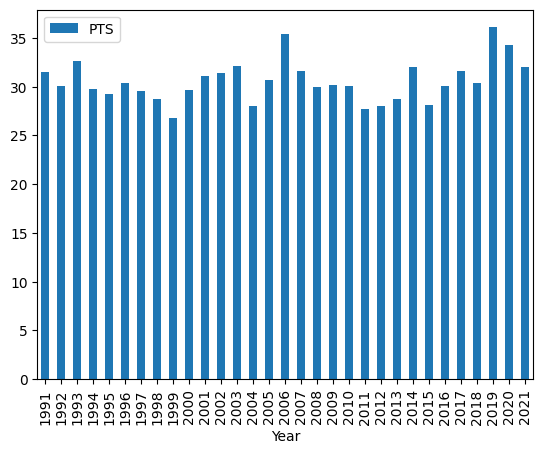

In [36]:
highest_scoring_by_year.plot.bar("Year", "PTS")

In [37]:
train.groupby("Year").apply(lambda x: x.shape[0])

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_56464/3126292839.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train.groupby("Year").apply(lambda x: x.shape[0])


Year
1991    385
1992    386
1993    390
1994    403
1995    405
1996    428
1997    441
1998    439
1999    440
2000    439
2001    441
2002    440
2003    428
2004    442
2005    464
2006    458
2007    458
2008    450
2009    443
2010    442
2011    452
2012    478
2013    467
2014    480
2015    492
2016    476
2017    486
2018    540
2019    530
2020    529
2021    540
dtype: int64

In [38]:
## Stats that are most related to MVP votes
train.select_dtypes(include=[np.number]).corr()["Share"]

Age        0.018596
G          0.089282
GS         0.167476
MP         0.162175
FG         0.276365
FGA        0.249254
FG%        0.064901
3P         0.096225
3PA        0.096460
3P%        0.030621
2P         0.275976
2PA        0.251885
2P%        0.061986
eFG%       0.058549
FT         0.316392
FTA        0.321457
FT%        0.040052
ORB        0.101375
DRB        0.213241
TRB        0.186209
AST        0.200253
STL        0.175041
BLK        0.154713
TOV        0.233015
PF         0.071046
PTS        0.288267
Year      -0.008135
Pts Won    0.995153
Pts Max    0.521335
Share      1.000000
MVP        0.723202
W          0.122718
L         -0.121866
W/L%       0.126559
GB        -0.101014
PS/G       0.045206
PA/G      -0.039617
SRS        0.122782
Name: Share, dtype: float64

In [39]:
## Game started, field goals, points average are strongly correlated with MVP votes.
train.select_dtypes(include=[np.number]).corr()["Share"].plot.bar()

<Axes: >

In [40]:
train.to_csv("player_mvp_stats.csv", index=False)

## Cleaning Player MVP Stats Dataset 

In [42]:
## Portions of the Cleaning Player MVP Stats Dataset were developed with assistance from Kaggle's NBA Stats: MVP Prediction section to help ##
## interpret instructions, clarify implementation steps, and structure code. Final code was reviewed and edited by me. ##

In [43]:
stats = pd.read_csv("player_mvp_stats.csv")
stats

Player Pos  Age   Tm   G  GS    MP   FG  FGA    FG%  ...  Share  \
0      ?an Tabak   C   24  HOU  37   0   4.9  0.6  1.4  0.453  ...    0.0   
1      ?an Tabak   C   25  TOR  67  18  19.9  3.4  6.2  0.543  ...    0.0   
2      ?an Tabak   C   26  TOR  13   4  16.8  2.5  5.5  0.451  ...    0.0   
3      ?an Tabak   C   27  BOS  57  34  17.3  2.5  5.3  0.467  ...    0.0   
4      ?an Tabak   C   29  IND  18   0   6.3  0.9  1.9  0.471  ...    0.0   
...          ...  ..  ...  ...  ..  ..   ...  ...  ...    ...  ...    ...   
14087  Ömer Aþýk   C   27  HOU  48  19  20.2  2.1  4.0  0.532  ...    0.0   
14088  Ömer Aþýk   C   28  NOP  76  76  26.1  2.8  5.4  0.517  ...    0.0   
14089  Ömer Aþýk   C   29  NOP  68  64  17.3  1.5  2.9  0.533  ...    0.0   
14090  Ömer Aþýk   C   30  NOP  31  19  15.5  1.0  2.1  0.477  ...    0.0   
14091  Ömer Aþýk   C   31  CHI  18   0  10.1  0.5  1.2  0.409  ...    0.0   

       MVP                  Team   W   L   W/L%    GB   PS/G   PA/G   SRS  
0        0       Houston Rockets  47  35  0.573  15.0  103.5  101.4  2.32  
1        0       Toronto Raptors  21  61  0.256  51.0   97.5  105.0 -7.20  
2        0       Toronto Raptors  30  52  0.366  39.0   95.5   98.6 -2.56  
3        0        Boston Celtics  36  46  0.439  19.0   95.9   98.5 -1.96  
4        0        Indiana Pacers  56  26  0.683   0.0  101.3   96.7  4.15  
...    ...                   ...  ..  ..    ...   ...    ...    ...   ...  
14087    0       Houston Rockets  54  28  0.659   8.0  107.7  103.1  5.06  
14088    0  New Orleans Pelicans  45  37  0.549  11.0   99.4   98.6  1.13  
14089    0  New Orleans Pelicans  30  52  0.366  37.0  102.7  106.5 -3.56  
14090    0  New Orleans Pelicans  34  48  0.415  27.0  104.3  106.4 -1.69  
14091    0         Chicago Bulls  27  55  0.329  23.0  102.9  110.0 -6.84  

[14092 rows x 42 columns]

In [44]:
## Look for missing values and remove them
stats.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
MVP        0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

In [45]:
stats[stats["3P%"].isnull()][["Player", "3PA"]].head()

Empty DataFrame
Columns: [Player, 3PA]
Index: []

In [46]:
stats[stats["FT%"].isnull()][["Player", "FTA"]].head()

Empty DataFrame
Columns: [Player, FTA]
Index: []

In [47]:
stats = stats.fillna(0)

In [48]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'MVP', 'Team', 'W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS'],
      dtype='object')

## Predicting MVP with Logistic Regression

In [50]:
### Portions of the Predicting MVP with Logistic Regression implementation were developed with assistance from OpenAI's ChatGPT to help ###
### interpret instructions, clarify implementation steps, and structure code. Final code was reviewed and edited by me. ###

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [52]:
predictors = ["Age", "G", "GS", "MP", "FG", "FGA", 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 
              'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 
              'PTS', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']

In [53]:
stats

Player Pos  Age   Tm   G  GS    MP   FG  FGA    FG%  ...  Share  \
0      ?an Tabak   C   24  HOU  37   0   4.9  0.6  1.4  0.453  ...    0.0   
1      ?an Tabak   C   25  TOR  67  18  19.9  3.4  6.2  0.543  ...    0.0   
2      ?an Tabak   C   26  TOR  13   4  16.8  2.5  5.5  0.451  ...    0.0   
3      ?an Tabak   C   27  BOS  57  34  17.3  2.5  5.3  0.467  ...    0.0   
4      ?an Tabak   C   29  IND  18   0   6.3  0.9  1.9  0.471  ...    0.0   
...          ...  ..  ...  ...  ..  ..   ...  ...  ...    ...  ...    ...   
14087  Ömer Aþýk   C   27  HOU  48  19  20.2  2.1  4.0  0.532  ...    0.0   
14088  Ömer Aþýk   C   28  NOP  76  76  26.1  2.8  5.4  0.517  ...    0.0   
14089  Ömer Aþýk   C   29  NOP  68  64  17.3  1.5  2.9  0.533  ...    0.0   
14090  Ömer Aþýk   C   30  NOP  31  19  15.5  1.0  2.1  0.477  ...    0.0   
14091  Ömer Aþýk   C   31  CHI  18   0  10.1  0.5  1.2  0.409  ...    0.0   

       MVP                  Team   W   L   W/L%    GB   PS/G   PA/G   SRS  
0        0       Houston Rockets  47  35  0.573  15.0  103.5  101.4  2.32  
1        0       Toronto Raptors  21  61  0.256  51.0   97.5  105.0 -7.20  
2        0       Toronto Raptors  30  52  0.366  39.0   95.5   98.6 -2.56  
3        0        Boston Celtics  36  46  0.439  19.0   95.9   98.5 -1.96  
4        0        Indiana Pacers  56  26  0.683   0.0  101.3   96.7  4.15  
...    ...                   ...  ..  ..    ...   ...    ...    ...   ...  
14087    0       Houston Rockets  54  28  0.659   8.0  107.7  103.1  5.06  
14088    0  New Orleans Pelicans  45  37  0.549  11.0   99.4   98.6  1.13  
14089    0  New Orleans Pelicans  30  52  0.366  37.0  102.7  106.5 -3.56  
14090    0  New Orleans Pelicans  34  48  0.415  27.0  104.3  106.4 -1.69  
14091    0         Chicago Bulls  27  55  0.329  23.0  102.9  110.0 -6.84  

[14092 rows x 42 columns]

In [54]:
stats

Player Pos  Age   Tm   G  GS    MP   FG  FGA    FG%  ...  Share  \
0      ?an Tabak   C   24  HOU  37   0   4.9  0.6  1.4  0.453  ...    0.0   
1      ?an Tabak   C   25  TOR  67  18  19.9  3.4  6.2  0.543  ...    0.0   
2      ?an Tabak   C   26  TOR  13   4  16.8  2.5  5.5  0.451  ...    0.0   
3      ?an Tabak   C   27  BOS  57  34  17.3  2.5  5.3  0.467  ...    0.0   
4      ?an Tabak   C   29  IND  18   0   6.3  0.9  1.9  0.471  ...    0.0   
...          ...  ..  ...  ...  ..  ..   ...  ...  ...    ...  ...    ...   
14087  Ömer Aþýk   C   27  HOU  48  19  20.2  2.1  4.0  0.532  ...    0.0   
14088  Ömer Aþýk   C   28  NOP  76  76  26.1  2.8  5.4  0.517  ...    0.0   
14089  Ömer Aþýk   C   29  NOP  68  64  17.3  1.5  2.9  0.533  ...    0.0   
14090  Ömer Aþýk   C   30  NOP  31  19  15.5  1.0  2.1  0.477  ...    0.0   
14091  Ömer Aþýk   C   31  CHI  18   0  10.1  0.5  1.2  0.409  ...    0.0   

       MVP                  Team   W   L   W/L%    GB   PS/G   PA/G   SRS  
0        0       Houston Rockets  47  35  0.573  15.0  103.5  101.4  2.32  
1        0       Toronto Raptors  21  61  0.256  51.0   97.5  105.0 -7.20  
2        0       Toronto Raptors  30  52  0.366  39.0   95.5   98.6 -2.56  
3        0        Boston Celtics  36  46  0.439  19.0   95.9   98.5 -1.96  
4        0        Indiana Pacers  56  26  0.683   0.0  101.3   96.7  4.15  
...    ...                   ...  ..  ..    ...   ...    ...    ...   ...  
14087    0       Houston Rockets  54  28  0.659   8.0  107.7  103.1  5.06  
14088    0  New Orleans Pelicans  45  37  0.549  11.0   99.4   98.6  1.13  
14089    0  New Orleans Pelicans  30  52  0.366  37.0  102.7  106.5 -3.56  
14090    0  New Orleans Pelicans  34  48  0.415  27.0  104.3  106.4 -1.69  
14091    0         Chicago Bulls  27  55  0.329  23.0  102.9  110.0 -6.84  

[14092 rows x 42 columns]

In [55]:
# Load your cleaned data (already done earlier)
stats = pd.read_csv("player_mvp_stats.csv")  # Adjust path as needed

# Confirm the MVP column exists
assert "MVP" in stats.columns, "MVP column is missing!"

# Define your features (you already have this)
predictors = ["Age", "G", "GS", "MP", "FG", "FGA", 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 
              'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 
              'PTS', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']

# Drop rows with missing values in predictors or target
model_data = stats.dropna(subset=predictors + ["MVP"])

In [56]:
X = model_data[predictors]
y = model_data["MVP"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
y_pred = log_reg.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9996452642781128
Logistic Regression Confusion Matrix:
 [[2817    0]
 [   1    1]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2817
           1       1.00      0.50      0.67         2

    accuracy                           1.00      2819
   macro avg       1.00      0.75      0.83      2819
weighted avg       1.00      1.00      1.00      2819



In [59]:
# First, include identifying info (Player, Year) with your feature data
id_cols = ["Player", "Year"]
X_full = model_data[id_cols + predictors].copy()
y_full = model_data["MVP"].copy()

# Re-split while keeping Player and Year for later display
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Separate predictors and identifying info
X_train = X_train_full[predictors]
X_test = X_test_full[predictors]

# Train the model (if not already done)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Get MVP probability predictions
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Combine probabilities with Player and Year
top_preds = X_test_full.copy()
top_preds["MVP_Prob"] = y_proba

# Show top 10 most likely MVPs
top_10 = top_preds.sort_values("MVP_Prob", ascending=False).head(10)
print(top_10[["Player", "Year", "MVP_Prob"]])

                  Player  Year  MVP_Prob
7821        Kevin Durant  2014  0.818487
7820        Kevin Durant  2013  0.436547
4105      Draymond Green  2016  0.396445
5309     Hakeem Olajuwon  1993  0.232333
6005        James Harden  2019  0.204374
11612  Russell Westbrook  2016  0.189980
3887       Dirk Nowitzki  2006  0.155204
6883         Joel Embiid  2021  0.123846
10458      Patrick Ewing  1993  0.110569
2420        Chris Webber  2002  0.096540


In [60]:
from sklearn.linear_model import LogisticRegression

# --- Train the model ---
X = stats[predictors]
y = stats["MVP"]

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

# --- Predict MVP probabilities ---
stats["MVP_Prob"] = log_reg.predict_proba(X)[:, 1]

# --- For each year, get predicted and actual MVP ---
def compare_predicted_vs_actual(df):
    results = []

    for year, group in df.groupby("Year"):
        predicted = group.sort_values("MVP_Prob", ascending=False).iloc[0]
        actual = group[group["MVP"] == 1].iloc[0]

        results.append({
            "Year": year,
            "Predicted MVP": predicted["Player"],
            "Predicted Prob": round(predicted["MVP_Prob"], 3),
            "Actual MVP": actual["Player"],
        })

    return pd.DataFrame(results)

comparison_df = compare_predicted_vs_actual(stats)
print(comparison_df)

    Year          Predicted MVP  Predicted Prob             Actual MVP
0   1991         Michael Jordan           0.775         Michael Jordan
1   1992         Michael Jordan           0.960         Michael Jordan
2   1993         Michael Jordan           0.601        Charles Barkley
3   1994        Hakeem Olajuwon           0.408        Hakeem Olajuwon
4   1995         David Robinson           0.517         David Robinson
5   1996         Michael Jordan           0.966         Michael Jordan
6   1997         Michael Jordan           0.862            Karl Malone
7   1998            Karl Malone           0.656         Michael Jordan
8   1999            Karl Malone           0.489            Karl Malone
9   2000       Shaquille O'Neal           0.980       Shaquille O'Neal
10  2001            Kobe Bryant           0.087          Allen Iverson
11  2002             Tim Duncan           0.685             Tim Duncan
12  2003             Tim Duncan           0.555             Tim Duncan
13  20

## Predicting MVP with Neural Network

In [62]:
## Portions of the Predicting MVP with NeuralNetwork implementation were developed with assistance from OpenAI's ChatGPT to help ##
## interpret instructions, clarify implementation steps, and structure code. Final code was reviewed and edited by me. ##

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Prepare data ---
X = stats[predictors]
y = stats["MVP"]

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split (optional, but helpful for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Define the model ---
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output is probability (MVP or not)
])

# --- Compile the model ---
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train the model ---
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# --- Predict MVP probabilities for all stats ---
stats["MVP_Prob_NN"] = model.predict(X_scaled).flatten()

# --- Compare predicted vs actual MVPs ---
def compare_nn_predicted_vs_actual(df):
    results = []

    for year, group in df.groupby("Year"):
        predicted = group.sort_values("MVP_Prob_NN", ascending=False).iloc[0]
        actual = group[group["MVP"] == 1].iloc[0]

        results.append({
            "Year": year,
            "Predicted MVP (NN)": predicted["Player"],
            "Predicted Prob (NN)": round(predicted["MVP_Prob_NN"], 3),
            "Actual MVP": actual["Player"],
        })

    return pd.DataFrame(results)

nn_comparison_df = compare_nn_predicted_vs_actual(stats)
print(nn_comparison_df)

Epoch 1/50


/Users/atharvatijare/Desktop/Atharva/UDEMY/Generative_AI/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.9711 - loss: 0.1244 - val_accuracy: 0.9993 - val_loss: 0.0054
Epoch 2/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9973 - loss: 0.0127 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 3/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.9969 - loss: 0.0135 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 4/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.9971 - loss: 0.0088 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 5/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9981 - loss: 0.0058 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 6/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.9983 - loss: 0.0054 - val_accuracy: 0.9993 - val_loss: 0.0030
Epoch 7/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9975 - loss: 0.0068 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 8/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9982 - loss: 0.0058 - val_accurac

In [64]:
# Binarize predictions (MVP if prob > 0.5)
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Accuracy
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))

# Confusion Matrix
print("Neural Network Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# Classification Report
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step
Neural Network Accuracy: 0.9985810571124513
Neural Network Confusion Matrix:
 [[2815    2]
 [   2    0]]
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2817
           1       0.00      0.00      0.00         2

    accuracy                           1.00      2819
   macro avg       0.50      0.50      0.50      2819
weighted avg       1.00      1.00      1.00      2819

